In [2]:
import requests
from pprint import pprint
PARAMS = {"markets": 'PBTC-USDC', "limit": "100"}

response = requests.get('https://api.dydx.exchange/v3/markets')

In [3]:
resp = response.json()['markets']
for market in resp:
    funding = float(resp[market]['nextFundingRate'])*24*365
    print(f'{market}  {funding:.0%}')

#pprint(resp)

BTC-USD  56%
SUSHI-USD  75%
AVAX-USD  39%
1INCH-USD  -9%
ETH-USD  53%
XMR-USD  52%
COMP-USD  91%
ALGO-USD  11%
BCH-USD  37%
CRV-USD  5%
UNI-USD  66%
MKR-USD  100%
LTC-USD  24%
EOS-USD  58%
DOGE-USD  92%
ATOM-USD  -5%
SOL-USD  128%
UMA-USD  26%
AAVE-USD  85%
ADA-USD  38%
SNX-USD  40%
FIL-USD  69%
ZEC-USD  43%
YFI-USD  11%
LINK-USD  59%
DOT-USD  31%
MATIC-USD  19%


<AxesSubplot:title={'center':'BTC-USD'}, xlabel='effectiveAt', ylabel='rate'>

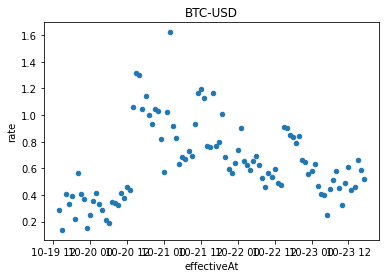

In [8]:
import matplotlib
import pandas as pd
market='BTC-USD'
response = requests.get('https://api.dydx.exchange/v3/historical-funding/'+market)
resp = response.json()['historicalFunding']

df = pd.json_normalize(resp)
df['rate'] = df['rate'].apply(lambda x: float(x)*365*24)
df['effectiveAt'] = pd.to_datetime(df['effectiveAt']).dt.tz_convert('Asia/Singapore')
#df
df.plot.scatter(y="rate", x="effectiveAt", title=market)
